In this notebook,Logistic Regression will be used to create a model for a telecommunication company,
 to predict when its customers will leave for a competitor, so that they can take some action to retain the customers.


In [1]:
# Lets first import required libraries:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt


### About the dataset
The dataset includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents


In [2]:
# Load Data From CSV File
Churn_data = pd.read_csv(r"D:\Data\ChurnData.csv")
print(Churn_data.head())

   tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0    11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1    33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2    23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3    38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4     7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   

   longmon  ...  pager  internet  callwait  confer  ebill  loglong  logtoll  \
0     4.40  ...    1.0       0.0       1.0     1.0    0.0    1.482    3.033   
1     9.45  ...    0.0       0.0       0.0     0.0    0.0    2.246    3.240   
2     6.30  ...    0.0       0.0       0.0     1.0    0.0    1.841    3.240   
3     6.05  ...    1.0       1.0       1.0     1.0    1.0    1.800    3.807   
4     7.10  ...    0.0       0.0       1.0     1.0    0.0    1.960    3.091   

   lninc  custcat  churn  
0  4.913      4.0    1.0  
1  3.497      

### Data pre-processing and selection

Lets select some features for the modeling. Also we change the target data type to be integer, as it is a
requirement by the skitlearn algorithm:

In [3]:
Churn_data = Churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
Churn_data['churn'] = Churn_data['churn'].astype('int')
Churn_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [4]:
print("The shape of the data set is: ", Churn_data.shape) # The shape of the data set is 200 rows and 10 columns


The shape of the data set is:  (200, 10)


In [6]:
# Lets define X, and y for our dataset:

X = np.asarray(Churn_data[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(Churn_data['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

### Normalization

In [8]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Train/Test dataset split

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


Modeling (Logistic Regression with Scikit-learn)
Lets build our model using Logistic Regression from Scikit-learn package. This function implements logistic  regression
and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers.

You can find extensive information about the pros and cons of these optimizers if you search it in internet.
The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the
over fitting problem in machine learning models. C parameter indicates inverse of regularization strength which must be a positive float.
Smaller values specify stronger regularization. Now lets fit our model with train set:

### Model training

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

### Model Prediction

In [11]:
# Now we can predict using our test set:

yhat = LR.predict(X_test)
print(yhat)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0]


predict_proba returns estimates for all classes, ordemred by the label of classes. So, the first column is the probability
of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):


In [12]:
yhat_prob = LR.predict_proba(X_test)
print("The probabilities are: ",yhat_prob)

The probabilities are:  [[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]
 [0.55386646 0.44613354]
 [0.52237207 0.47762793]
 [0.60514349 0.39485651]
 [0.41069572 0.58930428]
 [0.6333873  0.3666127 ]
 [0.58068791 0.41931209]
 [0.62768628 0.37231372]
 [0.47559883 0.52440117]
 [0.4267593  0.5732407 ]
 [0.66172417 0.33827583]
 [0.55092315 0.44907685]
 [0.51749946 0.48250054]
 [0.485743   0.514257  ]
 [0.49011451 0.50988549]
 [0.52423349 0.47576651]
 [0.61619519 0.38380481]
 [0.52696302 0.47303698]
 [0.63957168 0.36042832]
 [0.52205164 0.47794836]
 [0.50572852 0.49427148]
 [0.70706202 0.29293798]
 [0.55266286 0.44733714]
 [0.52271594 0.47728406]
 [0.51638863 0.48361137]
 [0.71331391 0.28668609]
 [0.67862111 0.32137889]
 [0.50896403 0.49103597]
 [0.42348082 0.57651918]
 [0.71495838 0.28504162]
 [0.59711064 0.40288936]
 [0.63808839 0.36191161]
 [0.39957895 0.60042105]
 [0.52127638 0.47872362]
 [0.65975464 0.34024536]
 

### Model Evaluation

jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size
of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels,
then the subset accuracy is 1.0; otherwise it is 0.0.

In [14]:
from sklearn.metrics import jaccard_score
print("The jaccard score is : ",jaccard_score(y_test, yhat))

The jaccard score is :  0.375


#### Confusion matrix

In [15]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    print(confusion_matrix(y_test, yhat, labels=[1, 0]))



In [16]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]
[[ 6  9]
 [ 1 24]]


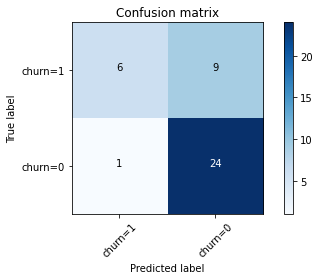

In [17]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

#### Interpretation of confusion matrix

The first row indicates customers whose actual churn value in the test set is 1. Which means, out of 40 customers, the churn
value of 15 of them is 1. Out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0. Which means
for 6 customers, the actual churn value were 1 in the test set, and classifier also correctly predicted those as 1.

However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good which can be 
considered as an error of the model for the first row.

For the second row, a total of 25 customers had actual churn values of 0. The classifier correctly predicted 24 of them as 0,
and one of them wrongly as 1.  Thus, the model did a good job predicting the customers with churn value 0.

A good thing about confusion matrix is that shows the model’s ability to correctly predict or
separate the classes. In specific case of binary classifier, such as this example, we can interpret these numbers as the count of
true positives, false positives, true negatives, and false negatives.


In [18]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:
Precision is a measure of the accuracy provided that a class label has been predicted. In other words, is the fraction of true 
positives among all predicted positives. The closer the precision is to 1, the better the model.
It is defined by: precision = TP / (TP + FP)
    
Recall is true positive rate. The closer the recall is to 1, the better the model.Recall is the fraction of postives predicted
correctly,
It is defined as: Recall = TP / (TP + FN)
    
F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision
and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

 And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in this case.
